In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [2]:
train_df=pd.read_csv('C:\\Users\\Dell\\OneDrive\\Desktop\\EXL DA course\\final project\\train.csv')

- Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
- Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)
- Numerical features: These features have numerical values (ApplicantIncome, Co-applicantIncome, LoanAmount, Loan_Amount_Term)

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.shape

(614, 13)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Statistical summary of data

In [6]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### How credit history affects the loan status

In [7]:
pd.crosstab(train_df['Credit_History'],train_df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


#### Applicants having credit history 1 are more eligible for the loan than one's who is having credit history 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


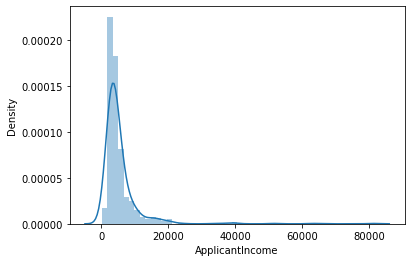

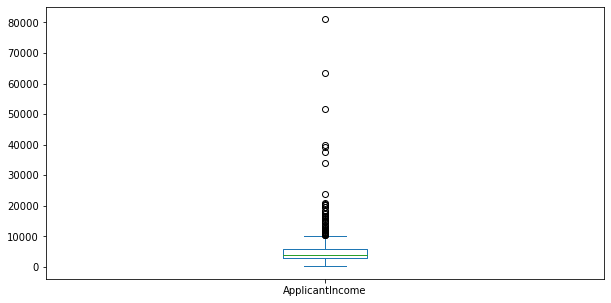

In [8]:
sns.distplot(train_df['ApplicantIncome'])
plt.show()
train_df['ApplicantIncome'].plot.box(figsize=(10,5))
plt.show()

#### its right skewed histogram

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


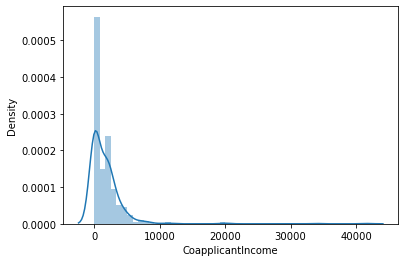

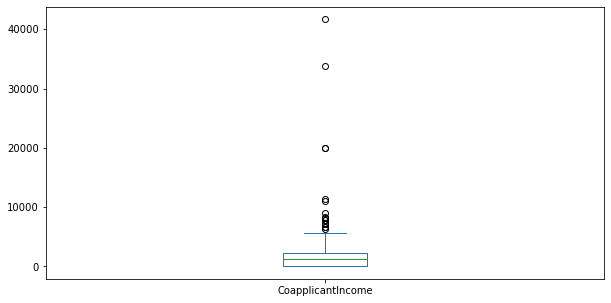

In [9]:
sns.distplot(train_df['CoapplicantIncome'])
plt.show()
train_df['CoapplicantIncome'].plot.box(figsize=(10,5))
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

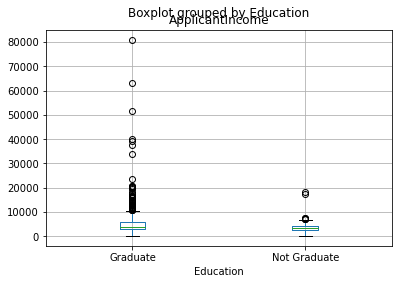

In [10]:
train_df.boxplot(column='ApplicantIncome', by ='Education')

#### Comment - The median salary does not vary too much for someone who graduate and not graduate but some graduates having  higher income 

<AxesSubplot:>

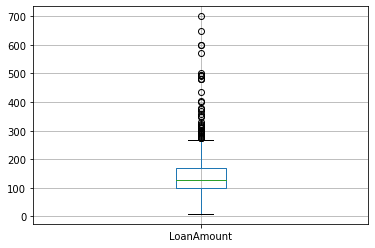

In [11]:
train_df.boxplot(column='LoanAmount')

<AxesSubplot:>

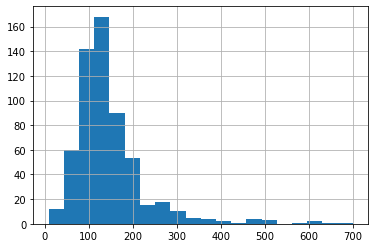

In [12]:
train_df['LoanAmount'].hist(bins=20)

<AxesSubplot:>

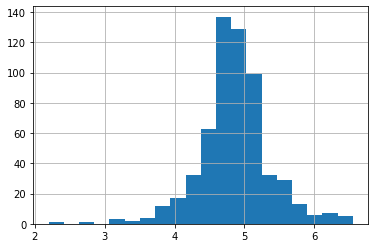

In [13]:
train_df['LoanAmount_log']=np.log(train_df['LoanAmount'])
train_df['LoanAmount_log'].hist(bins=20)

In [14]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [15]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0],inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0],inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0],inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0],inplace=True)

In [16]:
train_df.LoanAmount=train_df.LoanAmount.fillna(train_df.LoanAmount.median())
train_df.LoanAmount_log = train_df.LoanAmount_log.fillna(train_df.LoanAmount_log.median())

In [17]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,4.262680
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,3.688879
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,5.533389
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,5.231109


#### loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [18]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0],inplace=True)

In [19]:
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0],inplace=True)

In [20]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [21]:
train_df['LoanAmount']

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

#### Feature 1 -Total Income


In [22]:
train_df['TotalIncome']=train_df['ApplicantIncome']+train_df['CoapplicantIncome']
train_df['TotalIncome_log']=np.log(train_df['TotalIncome'])

<AxesSubplot:>

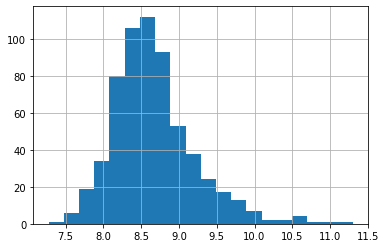

In [23]:
train_df['TotalIncome_log'].hist(bins=20)

In [24]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [25]:
train_df['Dependents'].replace('3+', 3,inplace=True)
train_df['Loan_Status'].replace('N', 0,inplace=True)
train_df['Loan_Status'].replace('Y', 1,inplace=True)

In [26]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1,5.231109,7583.0,8.933664


#### Feature 2 - Loan amount and Income  Ratio

In [27]:
train_df['loan_income_ratio'] = train_df['LoanAmount'] / train_df['ApplicantIncome']
train_df[['ApplicantIncome', 'LoanAmount', 'loan_income_ratio']].head()

,ApplicantIncome,LoanAmount,loan_income_ratio
0,5849,128.0,0.021884
1,4583,128.0,0.027929
2,3000,66.0,0.022000
3,2583,120.0,0.046458
4,6000,141.0,0.023500


In [28]:
train_df.drop(['LoanAmount','TotalIncome','Loan_ID'],axis=1,inplace=True)


In [29]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,loan_income_ratio
0,Male,No,0,Graduate,No,5849,0.0,360.0,1.0,Urban,1,4.852030,8.674026,0.021884
1,Male,Yes,1,Graduate,No,4583,1508.0,360.0,1.0,Rural,0,4.852030,8.714568,0.027929
2,Male,Yes,0,Graduate,Yes,3000,0.0,360.0,1.0,Urban,1,4.189655,8.006368,0.022000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,360.0,1.0,Urban,1,4.787492,8.505323,0.046458
4,Male,No,0,Graduate,No,6000,0.0,360.0,1.0,Urban,1,4.948760,8.699515,0.023500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,360.0,1.0,Rural,1,4.262680,7.972466,0.024483
610,Male,Yes,3,Graduate,No,4106,0.0,180.0,1.0,Rural,1,3.688879,8.320205,0.009742
611,Male,Yes,1,Graduate,No,8072,240.0,360.0,1.0,Urban,1,5.533389,9.025456,0.031343
612,Male,Yes,2,Graduate,No,7583,0.0,360.0,1.0,Urban,1,5.231109,8.933664,0.024660


In [30]:
for i in [train_df]:
    i["Gender"]=i["Gender"].map({"Male":0,"Female":1}).astype(int)
    i["Married"]=i["Married"].map({"No":0,"Yes":1}).astype(int)
    i["Education"]= i["Education"].map({"Not Graduate":0,"Graduate":1}).astype(int)
    i["Self_Employed"]= i["Self_Employed"].map({"No":0,"Yes":1}).astype(int)
    i["Credit_History"]=i["Credit_History"].astype(int)

In [31]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,loan_income_ratio
0,0,0,0,1,0,5849,0.0,360.0,1,Urban,1,4.852030,8.674026,0.021884
1,0,1,1,1,0,4583,1508.0,360.0,1,Rural,0,4.852030,8.714568,0.027929
2,0,1,0,1,1,3000,0.0,360.0,1,Urban,1,4.189655,8.006368,0.022000
3,0,1,0,0,0,2583,2358.0,360.0,1,Urban,1,4.787492,8.505323,0.046458
4,0,0,0,1,0,6000,0.0,360.0,1,Urban,1,4.948760,8.699515,0.023500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,360.0,1,Rural,1,4.262680,7.972466,0.024483
610,0,1,3,1,0,4106,0.0,180.0,1,Rural,1,3.688879,8.320205,0.009742
611,0,1,1,1,0,8072,240.0,360.0,1,Urban,1,5.533389,9.025456,0.031343
612,0,1,2,1,0,7583,0.0,360.0,1,Urban,1,5.231109,8.933664,0.024660


In [32]:
from sklearn import preprocessing

In [33]:
le=preprocessing.LabelEncoder()
train_df['Property_Area']=le.fit_transform(train_df['Property_Area'])

In [34]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome_log,loan_income_ratio
0,0,0,0,1,0,5849,0.0,360.0,1,2,1,4.852030,8.674026,0.021884
1,0,1,1,1,0,4583,1508.0,360.0,1,0,0,4.852030,8.714568,0.027929
2,0,1,0,1,1,3000,0.0,360.0,1,2,1,4.189655,8.006368,0.022000
3,0,1,0,0,0,2583,2358.0,360.0,1,2,1,4.787492,8.505323,0.046458
4,0,0,0,1,0,6000,0.0,360.0,1,2,1,4.948760,8.699515,0.023500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,360.0,1,0,1,4.262680,7.972466,0.024483
610,0,1,3,1,0,4106,0.0,180.0,1,0,1,3.688879,8.320205,0.009742
611,0,1,1,1,0,8072,240.0,360.0,1,2,1,5.533389,9.025456,0.031343
612,0,1,2,1,0,7583,0.0,360.0,1,2,1,5.231109,8.933664,0.024660


<AxesSubplot:>

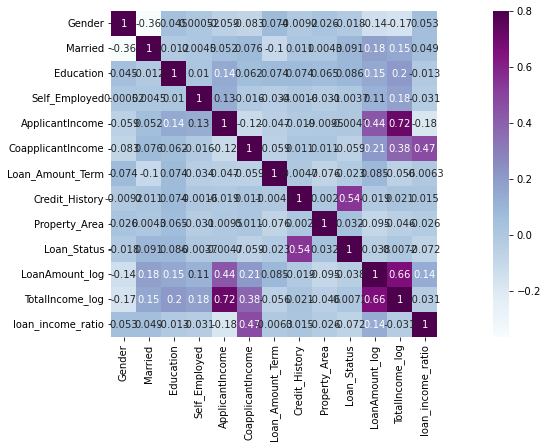

In [35]:
matrix = train_df.corr()
f, ax = plt.subplots(figsize=(20,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [36]:
x=train_df.drop("Loan_Status",axis=1)
y=train_df["Loan_Status"]

In [37]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [52]:
x_train.shape

(491, 13)

In [53]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = LogisticRegression()

model.fit(x_train, y_train)

# Predicting over the Train Set and calculating F1
train_pred = model.predict(x_train)
lr = f1_score(train_pred, y_train)
print('Train F1 score',lr)

# Predicting over the Train Set and calculating F1
test_pred=model.predict(x_test)
lr=f1_score(test_pred,y_test)
print('Test F1 score',lr)

Train F1 score 0.8736559139784946
Test F1 score 0.8910891089108911


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        33
           1       0.80      1.00      0.89        90

    accuracy                           0.82       123
   macro avg       0.90      0.67      0.70       123
weighted avg       0.86      0.82      0.79       123



In [56]:
forest=RandomForestClassifier()

forest.fit(x_train,y_train)

# Predicting over the Train Set and calculating F1
train_pred = forest.predict(x_train)
rf = f1_score(train_pred, y_train)
print('Train F1 score',rf)


# Predicting over the Train Set and calculating F1
test_pred=forest.predict(x_test)
rf=f1_score(test_pred,y_test)
print('Test F1 score',rf)



Train F1 score 1.0
Test F1 score 0.8601036269430052


In [57]:
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

# Predicting over the Train Set and calculating F1
train_pred = dtree.predict(x_train)
dt = f1_score(train_pred, y_train)
print('Train F1 score',dt)


# Predicting over the Train Set and calculating F1
test_pred=dtree.predict(x_test)
dt=f1_score(test_pred,y_test)
print('Test F1 score',dt)


Train F1 score 1.0
Test F1 score 0.7630057803468209


In [59]:
import pickle


In [60]:
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [61]:
with open('model_pkl' , 'rb') as f:
    lr = pickle.load(f)